In [151]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

# Read in data and set up dataframes

In [14]:
df = pd.read_csv('data/clean_data.csv', index_col=0)
df.date = pd.to_datetime(df.date)
df = df[['date','close','symbol']]
df_slv = df.loc[df.symbol == 'SLV']
df_sil = df.loc[df.symbol == 'SIL']
df_gld = df.loc[df.symbol == 'GLD']
df_gdx = df.loc[df.symbol == 'GDX']
df_dji = df.loc[df.symbol == 'DJI']

# Silver Visualizations

## Silver Bullion (SLV) Average Close by Month

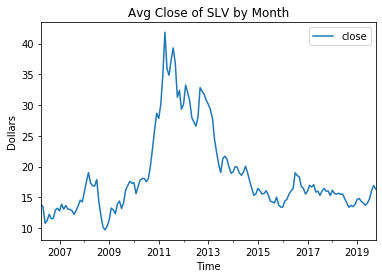

In [94]:
df_slv_mo = df_slv.groupby(pd.Grouper(key='date', freq='M')).mean()
df_slv_mo.plot()
plt.title('Avg Close of SLV by Month')
plt.ylabel('Dollars')
plt.xlabel('Time')
plt.show()

## Silver Bullion (SLV) and Silver Mining (SIL) Average Close by Year

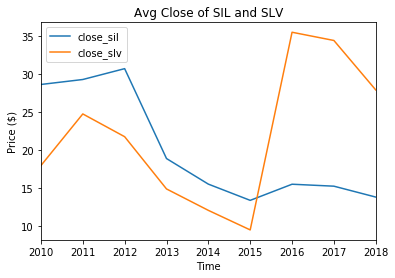

In [81]:
df_sil_mo = df_sil.groupby(pd.Grouper(key='date', freq='Y')).mean()
df_silvers = df_slv_mo.join(df_sil_mo,how='inner',on='date',lsuffix='_sil',rsuffix='_slv')
df_silvers.plot()
plt.title('Avg Close of SIL and SLV')
plt.ylabel('Price ($)')
plt.xlabel('Time')
plt.show()

## Silver Bullion (SLV) and Silver Mining (SIL) Average Percent Change

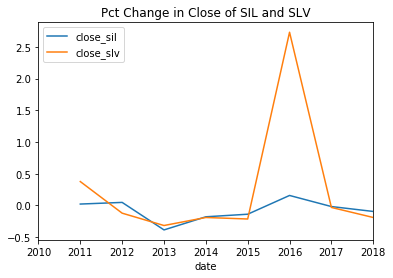

In [112]:
df_silvers.pct_change().plot()
plt.title('Pct Change in Close of SIL and SLV')
plt.show()

In [97]:
df_dji_yr = df_dji.groupby(pd.Grouper(key='date', freq='Y')).mean()
df_dji_mo = df_dji.groupby(pd.Grouper(key='date', freq='M')).mean()
df_dji_yr.head();

## Silver Bullion (SLV), Silver Mining (SIL), and Market Index Average Percent Change

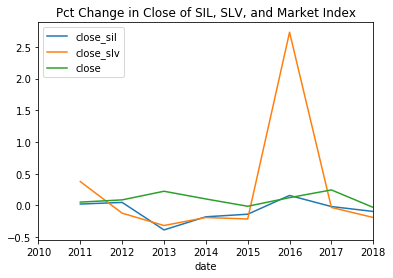

In [111]:
df_sv_ind = df_silvers.join(df_dji_mo, how='left',on='date')
df_sv_ind.pct_change().plot()
plt.title('Pct Change in Close of SIL, SLV, and Market Index')
plt.show()

# Gold Visualizations


## Gold Bullion (GLD) and Gold Mining (GDX) Average Close by Year

Text(0.5, 1.0, 'Avg Close of GLD and GDX by Year')

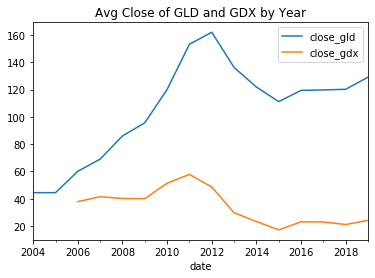

In [114]:
df_gld_yr = df_gld.groupby(pd.Grouper(key='date', freq='Y')).mean()
df_gdx_yr = df_gdx.groupby(pd.Grouper(key='date', freq='Y')).mean()
df_golds_yr = df_gld_yr.join(df_gdx_yr, how='left',on='date',lsuffix='_gld',rsuffix='_gdx')
df_gd_ind_yr = df_golds_yr.join(df_dji_yr,how='left',on='date')
df_golds_yr.plot()
plt.title('Avg Close of GLD and GDX by Year')

Text(0.5, 1.0, 'Avg Close of GLD and GDX by Month')

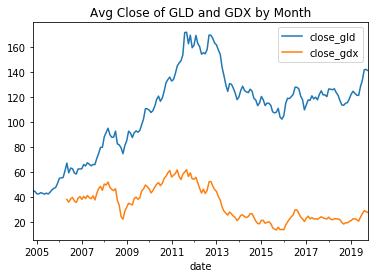

In [113]:
df_gld_mo = df_gld.groupby(pd.Grouper(key='date', freq='M')).mean()
df_gdx_mo = df_gdx.groupby(pd.Grouper(key='date', freq='M')).mean()
df_golds_mo = df_gld_mo.join(df_gdx_mo, how='left',on='date',lsuffix='_gld',rsuffix='_gdx')
df_gd_ind_mo = df_golds_mo.join(df_dji_mo,how='left',on='date')
df_golds_mo.plot()
plt.title('Avg Close of GLD and GDX by Month')

## Gold Bullion (GLD), Gold Mining (GDX), and Market Index Average Percent Change by Year

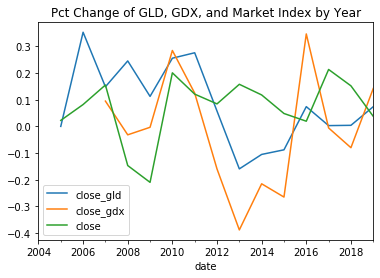

In [110]:
df_gd_ind_yr.pct_change().plot()
plt.title('Pct Change of GLD, GDX, and Market Index by Year')
plt.show()

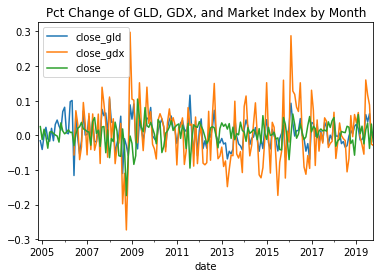

In [108]:
df_gd_ind_mo.pct_change().plot()
plt.title('Pct Change of GLD, GDX, and Market Index by Month')
plt.show()

# Step 1: Model Identification

## ARIMA Model using Box-Jenkins method

### Is there seasonality? 

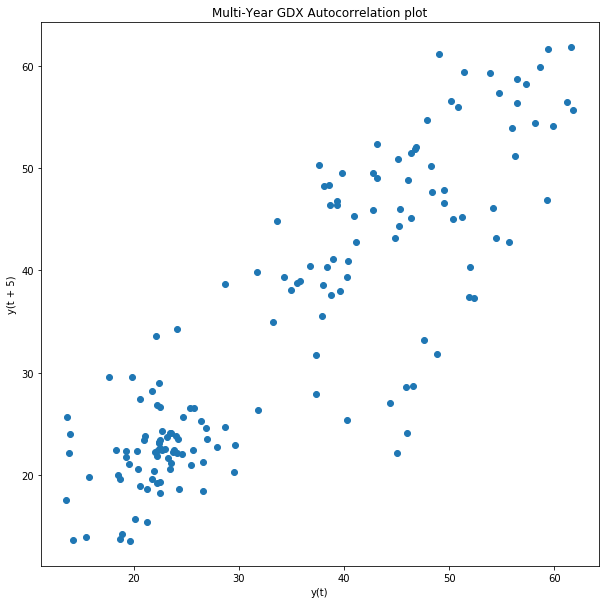

In [174]:
# look at an autocorrelation plot with a fixed lag of 5 
plt.figure(figsize=(10,10))
lag_plot(df_gdx_mo, lag=5)
plt.title('Multi-Year GDX Autocorrelation plot')
plt.show()

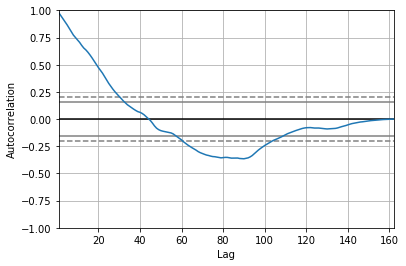

In [172]:
autocorrelation_plot(df_gdx_mo)
plt.show()

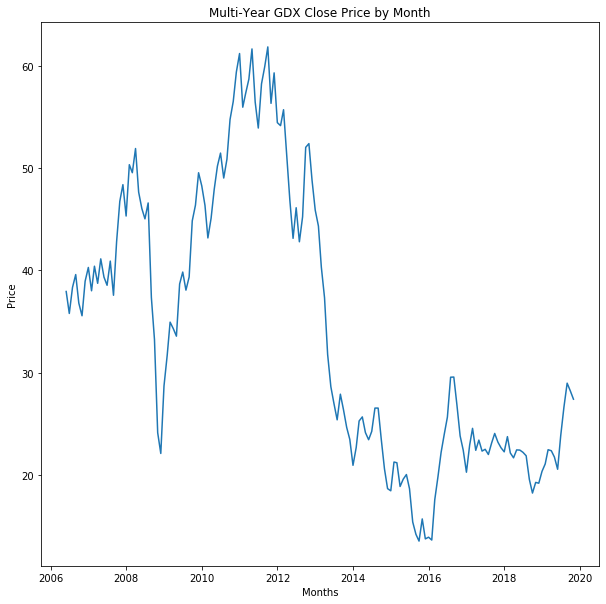

In [175]:
plt.figure(figsize=(10,10))
plt.plot(df_gdx_mo)
plt.xlabel('Months')
plt.ylabel('Price')
plt.title('Multi-Year GDX Close Price by Month')
plt.show()

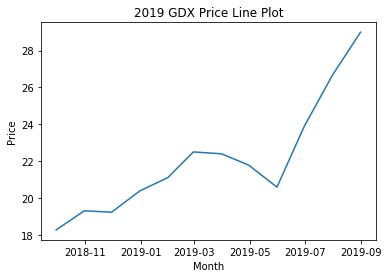

In [177]:
# create dataframe with one year's data 
df_gdx_mo_2019 = df_gdx_mo.loc[(df_gdx_mo.index> '2018-09-01') & (df_gdx_mo.index < '2019-09-01')]
df_gdx_mo_2019.shape
plt.plot(df_gdx_mo_2019)
plt.title('2019 GDX Price Line Plot')
plt.ylabel('Price')
plt.xlabel('Month')
plt.show()

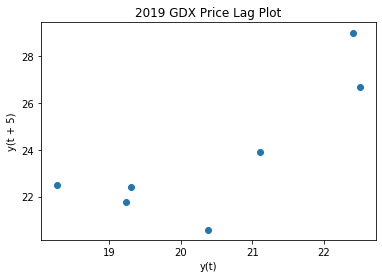

In [178]:
lag_plot(df_gdx_mo_2019, lag=5)
plt.title('2019 GDX Price Lag Plot')
plt.show()

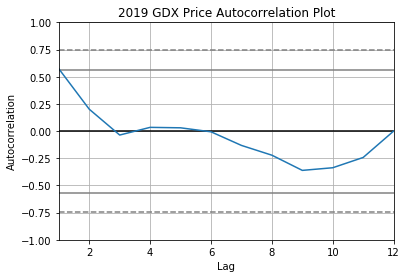

In [180]:
autocorrelation_plot(df_gdx_mo_2019)
plt.title('2019 GDX Price Autocorrelation Plot')
plt.show()

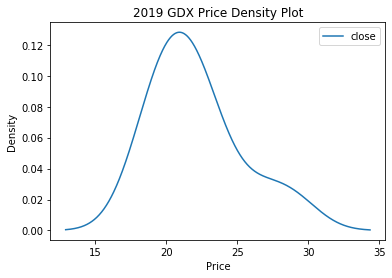

In [185]:
df_gdx_mo_2019.plot(kind='kde')
plt.title('2019 GDX Price Density Plot')
plt.xlabel('Price')
plt.show()

Three main parameters: <br>
p = number of lag observations <br>
d = degree of differencing <br>
q = the size of the moving average window

In [ ]:
model = ARIMA(df_gdx_mo, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())